# CS5412 - Machine Learning
## Homework 1
100 pts


## Goal

The goal of this homework is three-fold:

*   Introduction to the machine learning experimental set up 
*   Gain experience with Decision trees and k-NN approaches
*   Gain experience with the Scikit library

## Dataset
**MNIST** is a collection of 28x28 grayscale images of digits (0-9); hence each pixel is a gray-level from 0-255. 

The data is available under Resources/HW-Data .
It is downloaded from https://www.kaggle.com/oddrationale/mnist-in-csv
You can also use some other locations to download ()as it is a standard dataset with a separate test set) and possibly find utility code for, e.g. Yann LeCun's site.

**But you must use a 20% of the training data for validation** (no need for cross-validation as you have plenty of data) and **use the official test data (10,000 samples) only for testing.**

## Task 
Build 2 classifiers (decision tree, k-NN) with the scikit library function calls to classify digits in the MNIST dataset.


##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.


## 2) Load training dataset

*  Add your data files to the project and dont forget that any data allocation is taken back after 12 hours, so you may need to upload a few times.



In [ ]:
from keras.datasets import mnist
import numpy as np 

(trainData_2D, trainLabels), (testData_2D, testLabels) = mnist.load_data()


# Reshape training to 1D
train_sz = trainData_2D.shape
trainData = np.reshape(trainData_2D, (train_sz[0], train_sz[1]*train_sz[2])).astype('float32')

# Reshape testing to 1D
test_sz = testData_2D.shape
testData = np.reshape(testData_2D, (test_sz[0], test_sz[1]*test_sz[2])).astype('float32')

# Normalize
from sklearn.preprocessing import normalize
trainData = normalize(trainData)
testData = normalize(testData)





##3) Understanding the dataset

There are alot of functions that can be used to know more about this dataset

- What is the shape of the training set (num of samples X number of attributes) ***[shape function can be used]***

- Display attribute names ***[columns function can be used]***

- Display the first 5 rows from training dataset ***[head or sample functions can be used]***

..

In [ ]:
# print shape
print('Training Data Shape:', trainData.shape)
print('Testing Data Shape:', testData.shape)

#column names
print('Training Data Labels:', trainLabels)
print('Testing Data Labels:', testLabels)

#Head
print('Training Data first 5 rows:', trainData[:5])



Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)
Training Data Labels: [5 0 4 ... 5 6 8]
Testing Data Labels: [7 2 1 ... 4 5 6]
Training Data first 5 rows: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle

#we take a portion of our data
portion = 10

trainData = trainData[0:round(portion*train_sz[0]/100),]
trainLabels = trainLabels[0:round(portion*train_sz[0]/100)]

testData = testData[0:round(portion*test_sz[0]/100),]
testLabels = testLabels[0:round(portion*test_sz[0]/100)]

# Shuffle the training data
trainData = shuffle(trainData, random_state=20)
trainLabels = shuffle(trainLabels, random_state=20)


# Split 80-20
from sklearn.model_selection import train_test_split

(train_x, val_x, train_y, val_y) = train_test_split(trainData, trainLabels, test_size=0.2)
(test_x,val_x1, test_y, val_y1) = train_test_split(testData, testLabels, test_size=0.2)


##5) Train decision tree and k-NN  classifiers with the development portion of the training data

* Train a decision tree classifier with different values of "min_samples_split" which is the minimum number of samples required to split an internal node:  min_samples_split = [default = 1, 3, 5]. **After finding the best parameter, just leave that one trained**.

* Train a k-NN classifier (k=1 and k=5 and rest of the parameters set to default). **After finding the best parameter, just leave that one trained**.


## 6) Test your trained classifiers on the Validation set
Test your trained classifiers on the validation set and print the accuracies.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = [1,3,5]

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier

for k in kVals:
  
  # Train the k-Nearest Neighbor classifier with the current value of k
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(train_x, train_y)
  
  # Evaluate the model on validation set 
  score = model.score(val_x, val_y)
  print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
  
  # Update the accuracies list
  accuracies.append(score)

For k = 1, validation accuracy = 94.91667%
For k = 3, validation accuracy = 94.83333%
For k = 5, validation accuracy = 94.91667%


In [ ]:
from sklearn.tree import DecisionTreeClassifier


# initialize the values of k to be a list of odd numbers between 1 and 30
minSamplesLeaf =[1,5]

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

# loop over values of k for the k-Nearest Neighbor classifier

for m in minSamplesLeaf:
  
  # Train the k-Nearest Neighbor classifier with the current value of k
  model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=m)
  model.fit(train_x, train_y)
  
  # Evaluate the model on validation set 
  score = model.score(val_x, val_y)
  print("For m = %d, validation accuracy = %.5f%%" % (m, score * 100))
 
  
  # Update the accuracies list
  accuracies.append(score)
  
  # Find the index of k value with the highest validation accuracy
i = np.argmax(accuracies)
print("best min_leaf_split = %d with %.5f%% validation accuracy" % (minSamplesLeaf[i], accuracies[i] * 100))



For m = 1, validation accuracy = 41.41667%
For m = 5, validation accuracy = 41.41667%
best min_leaf_split = 1 with 41.41667% validation accuracy


## 7) Test your CHOSEN classifier on Test set

- Load test data
- Apply same pre-processing as training data (probably none)
- predict the labels of testing data **using the best chosen SINGLE model out of the models (2 approaches, 5 param. setting) that you have tried from step 6 (you have selected your model according to your validation results)** and report the accuracy. 

In [ ]:
from sklearn.metrics import accuracy_score

# Use misclassification rate as error measure

model = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=1)
model.fit(val_x, val_y)

# Predict the labels of the test data
predictions = model.predict(testData)

# Report your results

# Calculate the accuracy given the true labels and prediction of test data
from sklearn.metrics import accuracy_score
TestAccuracy = accuracy_score(testLabels, predictions)
print("Testing Accuracy with decision tree classifier = %.5f%%" % (TestAccuracy * 100))


# Train KNN with the best k value using [full] validation data 
model = KNeighborsClassifier(n_neighbors=1)
model.fit(val_x, val_y)

# Predict the labels of the test data
predictions = model.predict(testData)

# Calculate the accuracy given the true labels and prediction of test data
from sklearn.metrics import accuracy_score
TestAccuracy = accuracy_score(testLabels, predictions)
print("Testing Accuracy with K-NN= %.5f%%" % (TestAccuracy * 100))




Testing Accuracy with decision tree classifier = 36.70000%
Testing Accuracy with K-NN= 88.90000%


Testing Accuracy = 93.40000%
True Label is digit 4, Prediction is digit 4


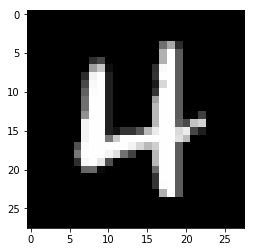

True Label is digit 4, Prediction is digit 4


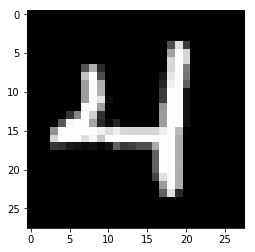

True Label is digit 7, Prediction is digit 7


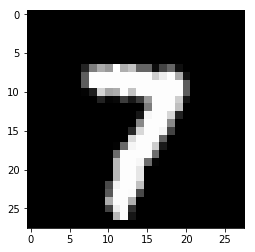

True Label is digit 6, Prediction is digit 6


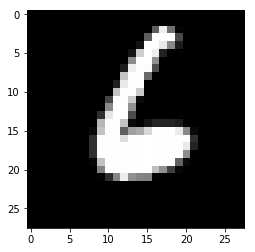

True Label is digit 2, Prediction is digit 2


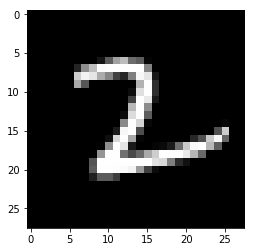

In [ ]:


# Train KNN with the best k value using [full] training data 
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainData, trainLabels)

# Predict the labels of the test data
predictions = model.predict(testData)

# Calculate the accuracy given the true labels and prediction of test data
from sklearn.metrics import accuracy_score
TestAccuracy = accuracy_score(testLabels, predictions)
print("Testing Accuracy = %.5f%%" % (TestAccuracy * 100))

# Print the confusion matrix of the testing data 
from sklearn.metrics import confusion_matrix


# Predict the labels of the test data
predictions = model.predict(testData)
import matplotlib.pyplot as plt

for i in np.random.randint(0, high=len(testLabels), size=(5,)):
  
  # get the image with index i from test data
  image = testData[i]

  # estimate the prediction
  prediction = model.predict([image])[0]
  

  # show the prediction

  imgdata = np.array(image, dtype='float')
  imgdata_2D = imgdata.reshape((train_sz[1],train_sz[2]))
  plt.imshow(imgdata_2D, cmap='gray')
  print("True Label is digit %d, Prediction is digit %d" %(testLabels[i], prediction))

  plt.show()


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf=confusion_matrix(testLabels,predictions)

print(conf)


[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  1   1 103   1   0   0   2   3   5   0]
 [  0   1   0 102   0   0   0   2   1   1]
 [  1   1   0   0 100   0   1   0   0   7]
 [  1   0   0   2   0  76   2   0   4   2]
 [  3   0   0   0   1   0  83   0   0   0]
 [  0   3   0   0   1   1   0  94   0   0]
 [  3   0   1   2   1   2   1   1  76   2]
 [  0   1   0   0   0   0   0   0   3  90]]


In [ ]:
import pandas as pd
true_labels =['true: ' + s for s in ['0','1','2','3','4','5','6','7','8','9']]
pred_labels =['pred: ' + s for s in  ['0','1','2','3','4','5','6','7','8','9']]
pd.DataFrame(conf,index=true_labels,columns=pred_labels)

,pred: 0,pred: 1,pred: 2,pred: 3,pred: 4,pred: 5,pred: 6,pred: 7,pred: 8,pred: 9
true: 0,84,0,0,0,0,0,1,0,0,0
true: 1,0,126,0,0,0,0,0,0,0,0
true: 2,1,1,103,1,0,0,2,3,5,0
true: 3,0,1,0,102,0,0,0,2,1,1
true: 4,1,1,0,0,100,0,1,0,0,7
true: 5,1,0,0,2,0,76,2,0,4,2
true: 6,3,0,0,0,1,0,83,0,0,0
true: 7,0,3,0,0,1,1,0,94,0,0
true: 8,3,0,1,2,1,2,1,1,76,2
true: 9,0,1,0,0,0,0,0,0,3,90
